In [198]:
import warnings
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.svm import SVC
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
import nltk
nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ozlem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [199]:
data = pd.read_csv("googleplaystore.csv")
comments = pd.read_csv("googleplaystore_user_reviews.csv")
comments.dropna(inplace = True, how = "any")
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [200]:
df.head(8)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up


In [201]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of word in this dataset such as '{}'... \n".format(len(comments.Translated_Review.unique()),
                                                                           ", ".join(comments.Translated_Review.unique()[0:5])))

There are 10841 observations and 13 features in this dataset. 

There are 27994 types of word in this dataset such as 'I like eat delicious food. That's I'm cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)", This help eating healthy exercise regular basis, Works great especially going grocery store, Best idea us, Best way'... 



In [202]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [203]:
comments.head(7)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000


In [204]:
comments.Translated_Review[16]

"Health It's important world either life . think? :)"

In [205]:
#comments.Sentiment_Subjectivity = comments.Sentiment_Polarity.apply(lambda x: float(x))

In [206]:
#comments = comments[comments["Sentiment_Subjectivity"] < 0.5]

In [207]:
len(comments)

37427

In [208]:
df.dropna(inplace = True, how = "any")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [209]:
df.head(100)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [210]:
print(len(data['Category'].unique()), "categories")
print(data['Category'].unique())

34 categories
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [211]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [212]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

In [213]:
df = df[df["Reviews"] > 10]

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8718 entries, 0 to 10840
Data columns (total 13 columns):
App               8718 non-null object
Category          8718 non-null object
Rating            8718 non-null float64
Reviews           8718 non-null int64
Size              7090 non-null float64
Installs          8718 non-null float64
Type              8718 non-null object
Price             8718 non-null float64
Content Rating    8718 non-null object
Genres            8718 non-null object
Last Updated      8718 non-null object
Current Ver       8718 non-null object
Android Ver       8718 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 953.5+ KB


In [215]:
df.drop(19, axis = 0)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.600,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.000,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.000,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.000,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.100,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


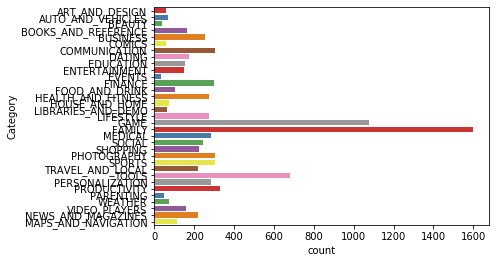

In [216]:
sns.countplot(y = "Category", data = df, palette = "Set1")

In [217]:
np.mean(df.Rating)

4.191041523285157

In [218]:
sep = ';'
rest = df.Genres.apply(lambda x: x.split(sep)[0])
df['Pri_Genres']=rest
df.Pri_Genres.head()

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
Name: Pri_Genres, dtype: object

In [219]:
rest = df.Genres.apply(lambda x: x.split(sep)[-1])
rest.unique()
df['Sec_Genres']=rest
df.Sec_Genres.head()

0    Art & Design
1    Pretend Play
2    Art & Design
3    Art & Design
4      Creativity
Name: Sec_Genres, dtype: object

In [220]:
df["Art & Design"]=[1 if i=="Art & Design" else 0 for i in df.Pri_Genres]
df["Tools"]=[1 if i=="Tolls" else 0 for i in df.Pri_Genres]
df["Role Playing"]=[1 if i=="Role Playing" else 0 for i in df.Pri_Genres]
df["Medical"]=[1 if i=="Medical" else 0 for i in df.Pri_Genres]
df["Casual"]=[1 if i=="Casual" else 0 for i in df.Pri_Genres]
df["Travel & Local"]=[1 if i=="Travel & Local" else 0 for i in df.Pri_Genres]
df["House & Home"]=[1 if i=="House & Home" else 0 for i in df.Pri_Genres]
df["Board"]=[1 if i=="Board" else 0 for i in df.Pri_Genres]
df["Simulation"]=[1 if i=="Simulation" else 0 for i in df.Pri_Genres]
df["Photography"]=[1 if i=="Photography" else 0 for i in df.Pri_Genres]
df["Food & Drink"]=[1 if i=="Food & Drink" else 0 for i in df.Pri_Genres]
df["Finance"]=[1 if i=="Finance" else 0 for i in df.Pri_Genres]
df["Video Players & Editors"]=[1 if i=="Video Players & Editors" else 0 for i in df.Pri_Genres]
df["Maps & Navigation"]=[1 if i=="Maps & Navigation" else 0 for i in df.Pri_Genres]
df["Trivia"]=[1 if i=="Trivia" else 0 for i in df.Pri_Genres]
df["Libraries & Demo"]=[1 if i=="Libraries & Demo" else 0 for i in df.Pri_Genres]
df["Arcade"]=[1 if i=="Arcade" else 0 for i in df.Pri_Genres]
df["Travel & Local"]=[1 if i=="Travel & Local" else 0 for i in df.Pri_Genres]
df["Maps & Navigation"]=[1 if i=="Maps & Navigation" else 0 for i in df.Pri_Genres]
df["Health & Fitness"]=[1 if i=="Health & Fitness" else 0 for i in df.Pri_Genres]
df["Lifestyle"]=[1 if i=="Lifestyle" else 0 for i in df.Genres]
df["Auto & Vehicles"]=[1 if i=="Auto & Vehicles" else 0 for i in df.Genres]
df["Dating"]=[1 if i=="Dating" else 0 for i in df.Genres]
df["Comics"]=[1 if i=="Comics" else 0 for i in df.Genres]
df["Puzzle"]=[1 if i=="Puzzle" else 0 for i in df.Genres]
df["Music & Video"]=[1 if i=="Music & Video" else 0 for i in df.Sec_Genres]
df["Beauty"]=[1 if i=="Beauty" else 0 for i in df.Genres]
df["Social"]=[1 if i=="Social" else 0 for i in df.Genres]
df["Education"]=[1 if i=="Education" else 0 for i in df.Genres]
df["Entertainment"]=[1 if i=="Entertainment" else 0 for i in df.Genres]
df["Action"]=[1 if i=="Action" else 0 for i in df.Genres]
df["Card"]=[1 if i=="Card" else 0 for i in df.Genres]
df["Strategy"]=[1 if i=="Strategy" else 0 for i in df.Genres]
df["Business"]=[1 if i=="Business" else 0 for i in df.Genres]
df["Books & Reference"]=[1 if i=="Books & Reference" else 0 for i in df.Genres]
df["News & Magazines"]=[1 if i=="News & Magazines" else 0 for i in df.Genres]
df["Weather"]=[1 if i=="Weather" else 0 for i in df.Genres]
df["Pretend Play"]=[1 if i=="Pretend Play" else 0 for i in df.Sec_Genres]
df["Creativity"]=[1 if i=="Creativity" else 0 for i in df.Sec_Genres]
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Entertainment,Action,Card,Strategy,Business,Books & Reference,News & Magazines,Weather,Pretend Play,Creativity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,0,0,0,0,0,0,0,0,1,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,...,0,0,0,0,0,0,0,0,0,1


In [221]:
#for rating in df.Rating:
#    if(rating > 5):
#        print(rating)

df=df.dropna()
df.shape

(7090, 52)

In [222]:
df.isnull().values.any()

False

In [223]:
#sns.pairplot(df, kind = "reg")

In [224]:
#sns.pairplot(df, kind = "scatter")

In [225]:
df.corr()

,Rating,Reviews,Size,Installs,Price,Art & Design,Tools,Role Playing,Medical,Casual,...,Entertainment,Action,Card,Strategy,Business,Books & Reference,News & Magazines,Weather,Pretend Play,Creativity
Rating,1.000000,0.093150,0.099408,0.061916,-0.026328,0.036589,NaN,0.031954,-0.004450,-0.002186,...,-0.048532,0.039638,-0.005248,0.018805,-0.025868,0.039673,-0.015795,0.012139,0.016025,0.027650
Reviews,0.093150,1.000000,0.241223,0.625301,-0.010510,-0.014268,NaN,-0.007145,-0.031706,0.112902,...,-0.030358,0.053233,-0.008175,0.184597,-0.025473,-0.020593,-0.020020,-0.010725,-0.012275,-0.008927
Size,0.099408,0.241223,1.000000,0.161050,-0.027420,-0.040344,NaN,0.143820,-0.033053,0.098152,...,-0.072164,0.247037,0.028063,0.141866,-0.061601,-0.049764,-0.064758,-0.037165,0.105508,0.033136
Installs,0.061916,0.625301,0.161050,1.000000,-0.011201,-0.013102,NaN,-0.013051,-0.033579,0.092154,...,-0.021768,0.058954,-0.008960,0.023512,-0.021172,-0.021386,0.051542,-0.010493,-0.007455,-0.007875
Price,-0.026328,-0.010510,-0.027420,-0.011201,1.000000,-0.005335,NaN,0.003725,0.026393,-0.009759,...,0.026090,-0.010722,-0.003357,-0.004409,-0.008480,-0.007677,-0.009416,-0.003216,-0.001407,-0.003307
Art & Design,0.036589,-0.014268,-0.040344,-0.013102,-0.005335,1.000000,NaN,-0.011500,-0.017873,-0.016469,...,-0.022518,-0.019818,-0.006635,-0.010732,-0.015607,-0.012617,-0.013785,-0.007797,0.019134,0.137544
Tools,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Role Playing,0.031954,-0.007145,0.143820,-0.013051,0.003725,-0.011500,NaN,1.000000,-0.024493,-0.022570,...,-0.030859,-0.027159,-0.009092,-0.014708,-0.021388,-0.017291,-0.018891,-0.010686,0.039790,-0.008183
Medical,-0.004450,-0.031706,-0.033053,-0.033579,0.026393,-0.017873,NaN,-0.024493,1.000000,-0.035078,...,-0.047961,-0.042210,-0.014132,-0.022859,-0.033242,-0.026873,-0.029361,-0.016608,-0.021105,-0.012718
Casual,-0.002186,0.112902,0.098152,0.092154,-0.009759,-0.016469,NaN,-0.022570,-0.035078,1.000000,...,-0.044195,-0.038896,-0.013022,-0.021064,-0.030631,-0.024763,-0.027055,-0.015304,0.207785,0.075615


In [226]:

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Entertainment,Action,Card,Strategy,Business,Books & Reference,News & Magazines,Weather,Pretend Play,Creativity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,0,0,0,0,0,0,0,0,1,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,...,0,0,0,0,0,0,0,0,0,1


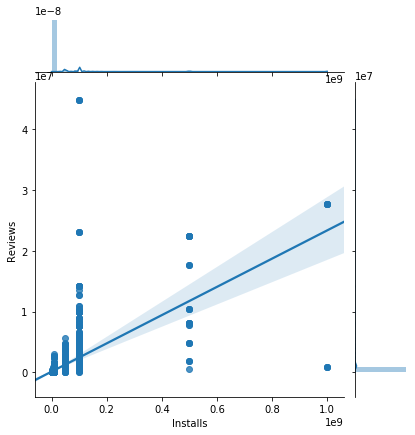

In [227]:
sns.jointplot(y = df['Reviews'], x = df['Installs'], kind = 'reg')

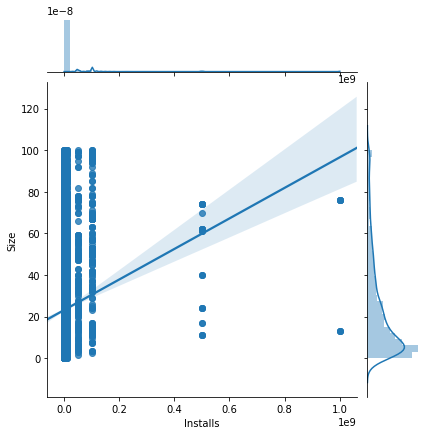

In [228]:
sns.jointplot(y = df['Size'], x = df['Installs'], kind = 'reg')

In [229]:
merged_df = pd.merge(df, comments, on=["App"])

In [230]:
categories = ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT',
 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK' ,'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL',
 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS',
 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']

for category in categories:
    exec('comment_{} = merged_df[merged_df["Category"] == category]'.format(category))
    
for category in categories:
    exec('df_{} = df[df["Category"] == category]'.format(category))
    print(category)
    exec("print(np.mean(df_{}))".format(category))


ART_AND_DESIGN
Rating                     4.370175e+00
Reviews                    1.907402e+04
Size                       1.311579e+01
Installs                   1.740842e+06
Price                      1.047368e-01
Art & Design               1.000000e+00
Tools                      0.000000e+00
Role Playing               0.000000e+00
Medical                    0.000000e+00
Casual                     0.000000e+00
Travel & Local             0.000000e+00
House & Home               0.000000e+00
Board                      0.000000e+00
Simulation                 0.000000e+00
Photography                0.000000e+00
Food & Drink               0.000000e+00
Finance                    0.000000e+00
Video Players & Editors    0.000000e+00
Maps & Navigation          0.000000e+00
Trivia                     0.000000e+00
Libraries & Demo           0.000000e+00
Arcade                     0.000000e+00
Health & Fitness           0.000000e+00
Lifestyle                  0.000000e+00
Auto & Vehicles          

Rating                          4.416667
Reviews                      4205.766667
Size                           12.331133
Installs                   354806.666667
Price                           0.000000
Art & Design                    0.000000
Tools                           0.000000
Role Playing                    0.000000
Medical                         0.000000
Casual                          0.000000
Travel & Local                  0.000000
House & Home                    0.000000
Board                           0.000000
Simulation                      0.000000
Photography                     0.000000
Food & Drink                    0.000000
Finance                         0.000000
Video Players & Editors         0.000000
Maps & Navigation               0.000000
Trivia                          0.000000
Libraries & Demo                0.000000
Arcade                          0.000000
Health & Fitness                0.000000
Lifestyle                       0.000000
Auto & Vehicles 

Rating                     4.267996e+00
Reviews                    1.416823e+06
Size                       4.580687e+01
Installs                   3.134779e+07
Price                      2.790556e-01
Art & Design               0.000000e+00
Tools                      0.000000e+00
Role Playing               1.573977e-02
Medical                    0.000000e+00
Casual                     3.987408e-02
Travel & Local             0.000000e+00
House & Home               0.000000e+00
Board                      3.882476e-02
Simulation                 1.154250e-02
Photography                0.000000e+00
Food & Drink               0.000000e+00
Finance                    0.000000e+00
Video Players & Editors    0.000000e+00
Maps & Navigation          0.000000e+00
Trivia                     2.728227e-02
Libraries & Demo           0.000000e+00
Arcade                     1.867786e-01
Health & Fitness           0.000000e+00
Lifestyle                  0.000000e+00
Auto & Vehicles            0.000000e+00


Rating                     4.225431e+00
Reviews                    2.266020e+05
Size                       2.728924e+01
Installs                   4.909080e+06
Price                      3.010345e-01
Art & Design               0.000000e+00
Tools                      0.000000e+00
Role Playing               0.000000e+00
Medical                    0.000000e+00
Casual                     0.000000e+00
Travel & Local             0.000000e+00
House & Home               0.000000e+00
Board                      0.000000e+00
Simulation                 0.000000e+00
Photography                0.000000e+00
Food & Drink               0.000000e+00
Finance                    0.000000e+00
Video Players & Editors    0.000000e+00
Maps & Navigation          0.000000e+00
Trivia                     0.000000e+00
Libraries & Demo           0.000000e+00
Arcade                     0.000000e+00
Health & Fitness           0.000000e+00
Lifestyle                  0.000000e+00
Auto & Vehicles            0.000000e+00


dtype: float64
MAPS_AND_NAVIGATION
Rating                     4.020690e+00
Reviews                    4.213691e+04
Size                       1.714414e+01
Installs                   2.011634e+06
Price                      5.712644e-02
Art & Design               0.000000e+00
Tools                      0.000000e+00
Role Playing               0.000000e+00
Medical                    0.000000e+00
Casual                     0.000000e+00
Travel & Local             0.000000e+00
House & Home               0.000000e+00
Board                      0.000000e+00
Simulation                 0.000000e+00
Photography                0.000000e+00
Food & Drink               0.000000e+00
Finance                    0.000000e+00
Video Players & Editors    0.000000e+00
Maps & Navigation          1.000000e+00
Trivia                     0.000000e+00
Libraries & Demo           0.000000e+00
Arcade                     0.000000e+00
Health & Fitness           0.000000e+00
Lifestyle                  0.000000e+00
Auto 

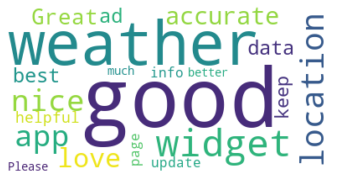

In [231]:
stop = stopwords.words('english')
stop = stop + ['app', 'APP' ,'ap', 'App', 'apps', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address',
            'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'Launcher']
text = " ".join(review for review in comment_WEATHER.Translated_Review if review not in stop)
wordcloud = WordCloud(background_color="white", max_words = 20).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [232]:

#X_train = comments.loc[:4999, 'Translated_Review'].values
#y_train = comments.loc[:4999, 'Sentiment'].values
#X_test = comments.loc[5000:, 'Translated_Review'].values
#y_test = comments.loc[5000:, 'Sentiment'].values


In [233]:
#import re
#import nltk
#from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
#text_list = []
#for i in comments.Translated_Review :
 #   review = re.sub('[^a-zA-Z]', ' ', i)
  #  review = review.lower() 
   # review = review.split()
    #ps = PorterStemmer()
    #review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #review = ' '.join(review) 
    #text_list.append(review)  


In [234]:
#text_list

In [235]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer(max_features = 1000)
#cv

In [236]:
#x = cv.fit_transform(text_list).toarray()
#y = comments.iloc[:, 1].values
#x

In [237]:
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [238]:
#lr_c=LogisticRegression()
#lr_c.fit(X_train,y_train)
#lr_pred=lr_c.predict(X_test)

In [239]:
#accuracy_score(y_test, lr_pred)

In [240]:
X=comments["Translated_Review"]
y=comments["Sentiment"]

In [241]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [242]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(29941, 19340) (7486, 19340)


In [243]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [244]:
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.6840769436281058


In [245]:
df.dropna(inplace=True)
print(df.shape)

(7090, 52)


In [246]:
df.isnull().values.any()

False

In [247]:
df["Rating"].value_counts()

4.4    808
4.5    800
4.3    798
4.2    714
4.6    622
4.1    581
4.0    437
4.7    395
3.9    326
3.8    255
4.8    187
3.7    180
3.6    144
3.5    141
3.4    104
3.3     93
4.9     80
3.1     61
3.2     53
5.0     47
3.0     44
2.9     41
2.8     36
2.6     20
2.7     18
2.4     17
2.5     17
2.3     13
2.2     11
1.9     11
2.1      8
2.0      8
1.7      6
1.8      6
1.4      3
1.6      3
1.5      1
1.2      1
Name: Rating, dtype: int64

In [248]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Entertainment,Action,Card,Strategy,Business,Books & Reference,News & Magazines,Weather,Pretend Play,Creativity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,0,0,0,0,0,0,0,0,1,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,...,0,0,0,0,0,0,0,0,0,1


In [249]:
#catgry=pd.get_dummies(df['Category'],prefix='catg',drop_first=True)
#typ=pd.get_dummies(df['Type'],prefix='typ',drop_first=True)
#cr=pd.get_dummies(df['Content Rating'],prefix='cr',drop_first=True)
#frames=[df,catgry,typ,cr]
#df=pd.concat(frames,axis=1)
##df.drop(['Category','Installs','Type','Content Rating'],axis=1,inplace=True)
#

In [250]:
df.drop(['App','Category','Type','Genres','Last Updated','Content Rating','Current Ver','Android Ver',"Pri_Genres","Sec_Genres",'Tools'],axis=1,inplace=True)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7090 entries, 0 to 10840
Data columns (total 41 columns):
Rating                     7090 non-null float64
Reviews                    7090 non-null int64
Size                       7090 non-null float64
Installs                   7090 non-null float64
Price                      7090 non-null float64
Art & Design               7090 non-null int64
Role Playing               7090 non-null int64
Medical                    7090 non-null int64
Casual                     7090 non-null int64
Travel & Local             7090 non-null int64
House & Home               7090 non-null int64
Board                      7090 non-null int64
Simulation                 7090 non-null int64
Photography                7090 non-null int64
Food & Drink               7090 non-null int64
Finance                    7090 non-null int64
Video Players & Editors    7090 non-null int64
Maps & Navigation          7090 non-null int64
Trivia                     7090 non-nu

In [252]:
#
X=df.drop('Rating',axis=1)
y=df['Rating'].values.astype("int64")


In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [254]:
#LogisticRegression
lr_c=LogisticRegression()
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)


In [255]:
lr_cm=confusion_matrix(y_test,lr_pred)
lr_cm

array([[   0,    0,    0,    5,    0],
       [   0,    0,    2,   33,    0],
       [   0,    0,    5,  283,    0],
       [   0,    0,    7, 1072,    0],
       [   0,    0,    0,   11,    0]], dtype=int64)

In [256]:
lr_ac=accuracy_score(y_test, lr_pred)
lr_ac

0.7595204513399154

In [257]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        35
           3       0.36      0.02      0.03       288
           4       0.76      0.99      0.86      1079
           5       0.00      0.00      0.00        11

   micro avg       0.76      0.76      0.76      1418
   macro avg       0.22      0.20      0.18      1418
weighted avg       0.65      0.76      0.66      1418



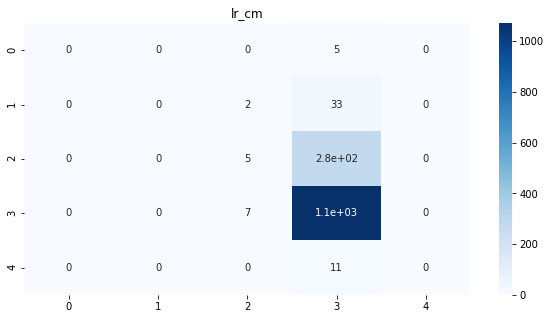

In [258]:
plt.figure(figsize=(10,5))
plt.title("lr_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues")
plt.show()

In [259]:
# DecisionTree 
dtree_c=DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf=5,random_state=42)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(y_test,dtree_pred)
dtree_ac

0.7595204513399154

In [260]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        35
           3       0.22      0.01      0.01       288
           4       0.76      0.99      0.86      1079
           5       1.00      0.18      0.31        11

   micro avg       0.76      0.76      0.76      1418
   macro avg       0.40      0.24      0.24      1418
weighted avg       0.63      0.76      0.66      1418



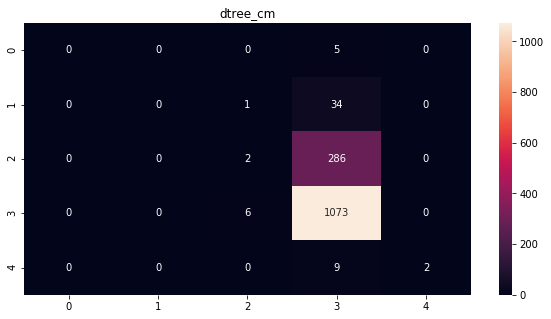

In [261]:
plt.figure(figsize=(10,5))
plt.title("dtree_cm")
sns.heatmap(dtree_cm,annot=True,fmt="d")


In [262]:
#SVM regressor
svc_r=SVC()
svc_r.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [263]:
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)
svr_ac

0.7623413258110014

In [264]:
print(classification_report(y_test,svr_pred))

              precision    recall  f1-score   support

           1       1.00      0.20      0.33         5
           2       0.33      0.03      0.05        35
           3       0.48      0.09      0.15       288
           4       0.77      0.98      0.86      1079
           5       0.00      0.00      0.00        11

   micro avg       0.76      0.76      0.76      1418
   macro avg       0.52      0.26      0.28      1418
weighted avg       0.70      0.76      0.69      1418



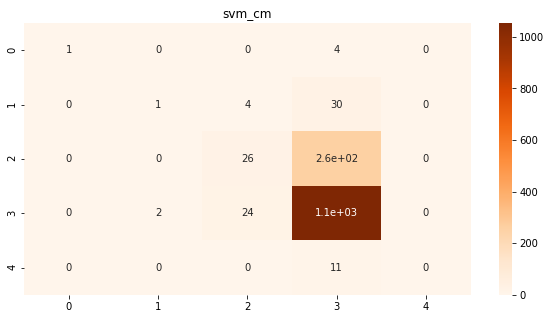

In [265]:
plt.figure(figsize=(10,5))
plt.title("svm_cm")
sns.heatmap(svr_cm,annot=True,cmap="Oranges")

In [266]:
#RandomForest
rdf_c=RandomForestClassifier(n_estimators = 200, n_jobs=-1)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(y_test,rdf_pred)
rdf_ac

0.7651622002820875

In [267]:
print(classification_report(y_test,rdf_pred))

              precision    recall  f1-score   support

           1       0.25      0.20      0.22         5
           2       0.40      0.11      0.18        35
           3       0.49      0.27      0.35       288
           4       0.81      0.93      0.86      1079
           5       1.00      0.09      0.17        11

   micro avg       0.77      0.77      0.77      1418
   macro avg       0.59      0.32      0.36      1418
weighted avg       0.73      0.77      0.73      1418



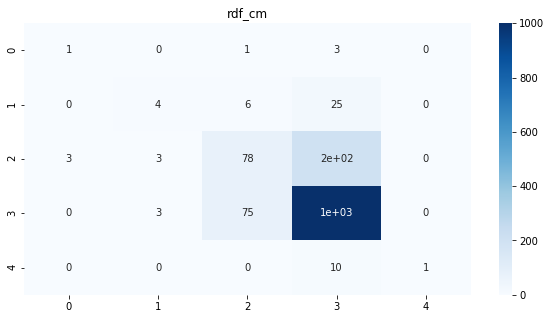

In [268]:
plt.figure(figsize=(10,5))
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,cmap="Blues")

Text(0.5, 1.0, 'Model Accuracy')

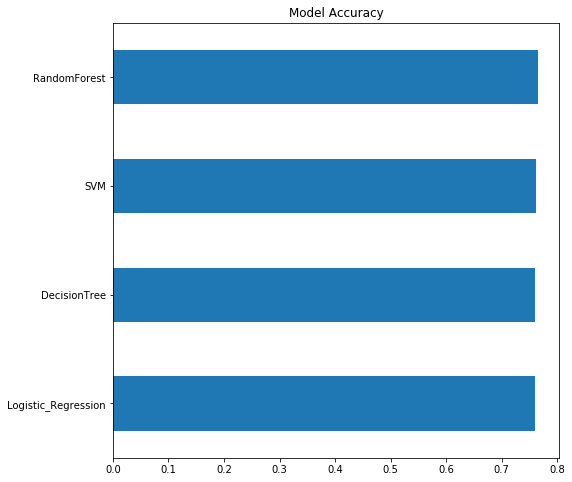

In [269]:
model_accuracy = pd.Series(data=[lr_ac,dtree_ac,svr_ac,rdf_ac], 
        index=['Logistic_Regression','DecisionTree','SVM','RandomForest'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')

In [270]:
#rf_params={"max_depth":[2,5,8,10],"max_features":[2,5,8],"n_estimators":[10,500,1000],"min_samples_split":[2,5,10]}

In [271]:
#rf_cv_model=GridSearchCV(rdf_c,rf_params,cv=10,n_jobs=-1,verbose=5)

In [272]:
#rf_cv_model.fit(X_train,y_train)

In [273]:
#rf_cv_model.best_params_

In [274]:
#rf_tuned=RandomForestClassifier(max_depth=10,max_features=8,min_samples_split=2,n_estimators=500)
#rf_tuned.fit(X_train,y_train)

In [275]:
#y_pred=rf_tuned.predict(X_test)
#accuracy_score(y_test,y_pred)

In [276]:
#print(classification_report(y_test,y_pred))

(-0.5, 399.5, 199.5, -0.5)

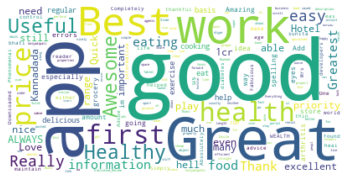

In [277]:
text = comments[comments['Sentiment']=='Positive']['Translated_Review']
text = str(text)
wordcloud = WordCloud(max_font_size=100, max_words=200, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

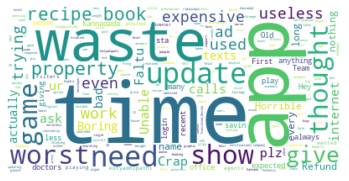

In [278]:
text = comments[comments['Sentiment']=='Negative']['Translated_Review']
text = str(text)
wordcloud = WordCloud(max_font_size=100, max_words=200, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

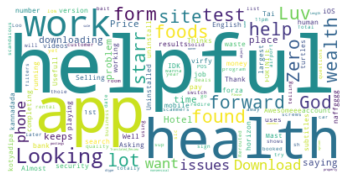

In [279]:
text = comments[comments['Sentiment']=='Neutral']['Translated_Review']
text = str(text)
wordcloud = WordCloud(max_font_size=100, max_words=200, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [280]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
text_list = []
for i in comments.Translated_Review :
    review = re.sub('[^a-zA-Z]', ' ', i)
    review = review.lower() 
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) 
    text_list.append(review)  

In [281]:
#text_list=[]
#for i in comments.Translated_Review:
#    text=re.sub("[^a-zA-Z]"," ",i)
#    text=text.lower()
#    text=nltk.word_tokenize(text)
#    lemma=nltk.WordNetLemmatizer()
#    text=[lemma.lemmatize(word) for word in text]
#    text=" ".join(text)
#    text_list.append(text)
#text_list[:5]

In [282]:
#from sklearn.feature_extraction.text import CountVectorizer
#max_features=1000
#cou_vec=CountVectorizer(max_features=max_features) # stop_words="english" you can add but we have already applied it.
#sparce_matrix=cou_vec.fit_transform(text_list).toarray()
#all_words=cou_vec.get_feature_names()
#all_words[0:50]

In [283]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer(max_features = 1000)
#x = cv.fit_transform(text_list).toarray()
#y = comments.iloc[:, 1].values

In [284]:
x=comments['Translated_Review']
y=comments['Sentiment']

#y = comments.iloc[:,1].values
#x= sparce_matrix

In [285]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [286]:
from sklearn.feature_extraction.text import CountVectorizer  
vect = CountVectorizer(stop_words='english',strip_accents='ascii',max_features=1000).fit(X_train)  
len(vect.get_feature_names())

1000

In [287]:
X_train_vectorized = vect.transform(X_train)  
X_train_vectorized

<29941x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 248356 stored elements in Compressed Sparse Row format>

In [288]:
x_test_transformed = vect.transform(X_test)

In [289]:
##DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train_vectorized,y_train)
print(confusion_matrix(y_test,dt.predict(x_test_transformed)))


[[1254  112  287]
 [  64  844  141]
 [ 275  177 4332]]


In [290]:
accuracy_score(y_test,dt.predict(x_test_transformed))

0.8589366818060379

In [291]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state=42)
rf.fit(X_train_vectorized,y_train)
rf.predict(x_test_transformed)


array(['Positive', 'Neutral', 'Negative', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [292]:
accuracy_score(y_test,rf.predict(x_test_transformed))

0.8751001870157628